In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

In [113]:
data = pd.read_csv('Male+Female.csv') #Load Data
filename = 'GroupRegulation_male.csv'

In [114]:
#define inputs and outputs for pls
inputs=['HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7','HDAC8','HDAC9','HDAC10','HDAC11','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7', 'KAT2A', 'KAT2B', 'HAT1', 'ATF2', 'KAT5', 'KAT6A', 'KAT6B', 'KAT7', 'EP300', 'CREBBP', 'NCOA1', 'NCOA3', 'TAF1','GTF3C1', 'CLOCK']
midputs=['FOXO1', 'FOXO3', 'GATA4', 'GATA6', 'HIF1A', 'KLF4', 'KLF5', 'MEF2A', 'NFAT5', 'NFKB1', 'NKX25', 'NOTCH1', 'RUNX1', 'SHMT2', 'SOD1', 'TBX5', 'TGFB1','TRIM28', 'YY1']
outputs=['SCN5A', 'CACNA1C', 'KCNH2', 'KCNQ1', 'KCNJ2', 'ATP1A1', 'SLC8A1', 'ATP2A2', 'RYR2', 'GJA1']

In [115]:
data = data.drop(['ID'], axis = 1)
Sex = data['Sex']
data_s = data.drop(['Sex'], axis = 1)
#Seperate by sex
Male_Data = data[Sex==0]
Female_Data = data[Sex==1]

In [116]:
    X_data = Male_Data[inputs]
    y_data = Male_Data[midputs]
    z_data = Male_Data[outputs]

In [117]:
#create PLS model using inputs to midputs and then midputs to outputs
pls1 = PLSRegression(n_components = 4, scale = False)
pls3 = PLSRegression(n_components = 4, scale = False)
pls1.fit(X_data, z_data)
pls3.fit(y_data, z_data)

PLSRegression(n_components=4, scale=False)

In [118]:
#put resulting beta matrix into dataframe
beta1 = pd.DataFrame(data = pls1.coef_, columns = outputs, index = inputs)
beta3 = pd.DataFrame(data = pls3.coef_, columns = outputs, index = midputs)

In [119]:
#define effects of interest
depol = ['SCN5A', 'CACNA1C', 'SLC8A1']
repol = ['KCNH2', 'KCNQ1', 'KCNJ2', 'ATP1A1']
rest = ['KCNJ2', 'ATP1A1']
cal = ['ATP2A2', 'RYR2', 'SLC8A1','CACNA1C']
coup = ['GJA1']

In [120]:
hdacs = ['HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11']
sirts = ['SIRT1', 'SIRT2', 'SIRT3', 'SIRT4', 'SIRT5', 'SIRT6', 'SIRT7']
hats = ['KAT2A', 'KAT2B', 'HAT1', 'ATF2', 'KAT5', 'KAT6A', 'KAT6B', 'KAT7', 'EP300', 'CREBBP', 'NCOA1', 'NCOA3', 'TAF1','GTF3C1', 'CLOCK']
tfs = midputs


In [121]:
#seperate different groupings
B1_depol = beta1[depol]
B1_repol = beta1[repol]
B1_rest = beta1[rest]
B1_cal = beta1[cal]
B1_coup = beta1[coup]

B3_depol = beta3[depol]
B3_repol = beta3[repol]
B3_rest = beta3[rest]
B3_cal = beta3[cal]
B3_coup = beta3[coup]

In [122]:
#Take average effect of each group on 
s1_depol = B1_depol.mean(axis = 1)
s1_repol = B1_repol.mean(axis = 1)
s1_net = s1_depol - s1_repol #net effect of depol and repol from hdacs,sirts, hats --> tfs
s1_rest = B1_rest.mean(axis = 1)
s1_cal = B1_cal.mean(axis = 1)
s1_coup = B1_coup.mean(axis = 1)

s3_depol = B3_depol.mean(axis = 1)
s3_repol = B3_repol.mean(axis = 1)
s3_net = s3_depol- s3_repol #net effect of depol and repol from tfs --> ion channels
s3_rest = B3_rest.mean(axis = 1)
s3_cal = B3_cal.mean(axis = 1)
s3_coup = B3_coup.mean(axis = 1)

In [123]:
import seaborn as sns

In [124]:
color = sns.diverging_palette(10, 140, s=90, as_cmap=True) 

In [125]:
#Package into dataframe for visualization
df_depol = pd.DataFrame()
df_repol = pd.DataFrame()
df_net = pd.DataFrame()
df_rest = pd.DataFrame()
df_cal = pd.DataFrame()
df_coup = pd.DataFrame()

df_depol['Channels'] = s1_depol[hdacs].index.values
df_repol['Channels'] = s1_repol[hdacs].index.values
df_net['Channels'] = s1_net[hdacs].index.values
df_rest['Channels'] = s1_rest[hdacs].index.values
df_cal['Channels'] = s1_cal[hdacs].index.values
df_coup['Channels'] = s1_coup[hdacs].index.values

df_depol['Values'] = s1_depol[hdacs].values
df_repol['Values'] = s1_repol[hdacs].values
df_net['Values'] = s1_net[hdacs].values
df_rest['Values'] = s1_rest[hdacs].values
df_cal['Values'] = s1_cal[hdacs].values
df_coup['Values'] = s1_coup[hdacs].values

df_depol['Grouping'] = 'Depolarization'
df_repol['Grouping'] = 'Repolarization'
df_net['Grouping'] = 'Net'
df_rest['Grouping'] = 'Rest'
df_cal['Grouping'] = 'Calcium'
df_coup['Grouping'] = 'Coupling'

df_hdac = df_depol.append([df_repol, df_net, df_rest, df_cal, df_coup])

In [126]:
df_depol = pd.DataFrame()
df_repol = pd.DataFrame()
df_net = pd.DataFrame()
df_rest = pd.DataFrame()
df_cal = pd.DataFrame()
df_coup = pd.DataFrame()

df_depol['Channels'] = s1_depol[sirts].index.values
df_repol['Channels'] = s1_repol[sirts].index.values
df_net['Channels'] = s1_net[sirts].index.values
df_rest['Channels'] = s1_rest[sirts].index.values
df_cal['Channels'] = s1_cal[sirts].index.values
df_coup['Channels'] = s1_coup[sirts].index.values

df_depol['Values'] = s1_depol[sirts].values
df_repol['Values'] = s1_repol[sirts].values
df_net['Values'] = s1_net[sirts].values
df_rest['Values'] = s1_rest[sirts].values
df_cal['Values'] = s1_cal[sirts].values
df_coup['Values'] = s1_coup[sirts].values

df_depol['Grouping'] = 'Depolarization'
df_repol['Grouping'] = 'Repolarization'
df_net['Grouping'] = 'Net'
df_rest['Grouping'] = 'Rest'
df_cal['Grouping'] = 'Calcium'
df_coup['Grouping'] = 'Coupling'

df_sirt = df_depol.append([df_repol, df_net, df_rest, df_cal, df_coup])

In [127]:
df_depol = pd.DataFrame()
df_repol = pd.DataFrame()
df_net = pd.DataFrame()
df_rest = pd.DataFrame()
df_cal = pd.DataFrame()
df_coup = pd.DataFrame()

df_depol['Channels'] = s1_depol[hats].index.values
df_repol['Channels'] = s1_repol[hats].index.values
df_net['Channels'] = s1_net[hats].index.values
df_rest['Channels'] = s1_rest[hats].index.values
df_cal['Channels'] = s1_cal[hats].index.values
df_coup['Channels'] = s1_coup[hats].index.values

df_depol['Values'] = s1_depol[hats].values
df_repol['Values'] = s1_repol[hats].values
df_net['Values'] = s1_net[hats].values
df_rest['Values'] = s1_rest[hats].values
df_cal['Values'] = s1_cal[hats].values
df_coup['Values'] = s1_coup[hats].values

df_depol['Grouping'] = 'Depolarization'
df_repol['Grouping'] = 'Repolarization'
df_net['Grouping'] = 'Net'
df_rest['Grouping'] = 'Rest'
df_cal['Grouping'] = 'Calcium'
df_coup['Grouping'] = 'Coupling'

df_hat = df_depol.append([df_repol, df_net, df_rest, df_cal, df_coup])

df_depol = pd.DataFrame()
df_repol = pd.DataFrame()
df_net = pd.DataFrame()
df_rest = pd.DataFrame()
df_cal = pd.DataFrame()
df_coup = pd.DataFrame()

df_depol['Channels'] = s3_depol[tfs].index.values
df_repol['Channels'] = s3_repol[tfs].index.values
df_net['Channels'] = s3_net[tfs].index.values
df_rest['Channels'] = s3_rest[tfs].index.values
df_cal['Channels'] = s3_cal[tfs].index.values
df_coup['Channels'] = s3_coup[tfs].index.values

df_depol['Values'] = s3_depol[tfs].values
df_repol['Values'] = s3_repol[tfs].values
df_net['Values'] = s3_net[tfs].values
df_rest['Values'] = s3_rest[tfs].values
df_cal['Values'] = s3_cal[tfs].values
df_coup['Values'] = s3_coup[tfs].values

df_depol['Grouping'] = 'Depolarization'
df_repol['Grouping'] = 'Repolarization'
df_net['Grouping'] = 'Net'
df_rest['Grouping'] = 'Rest'
df_cal['Grouping'] = 'Calcium'
df_coup['Grouping'] = 'Coupling'

df_tf = df_depol.append([df_repol, df_net, df_rest, df_cal, df_coup])

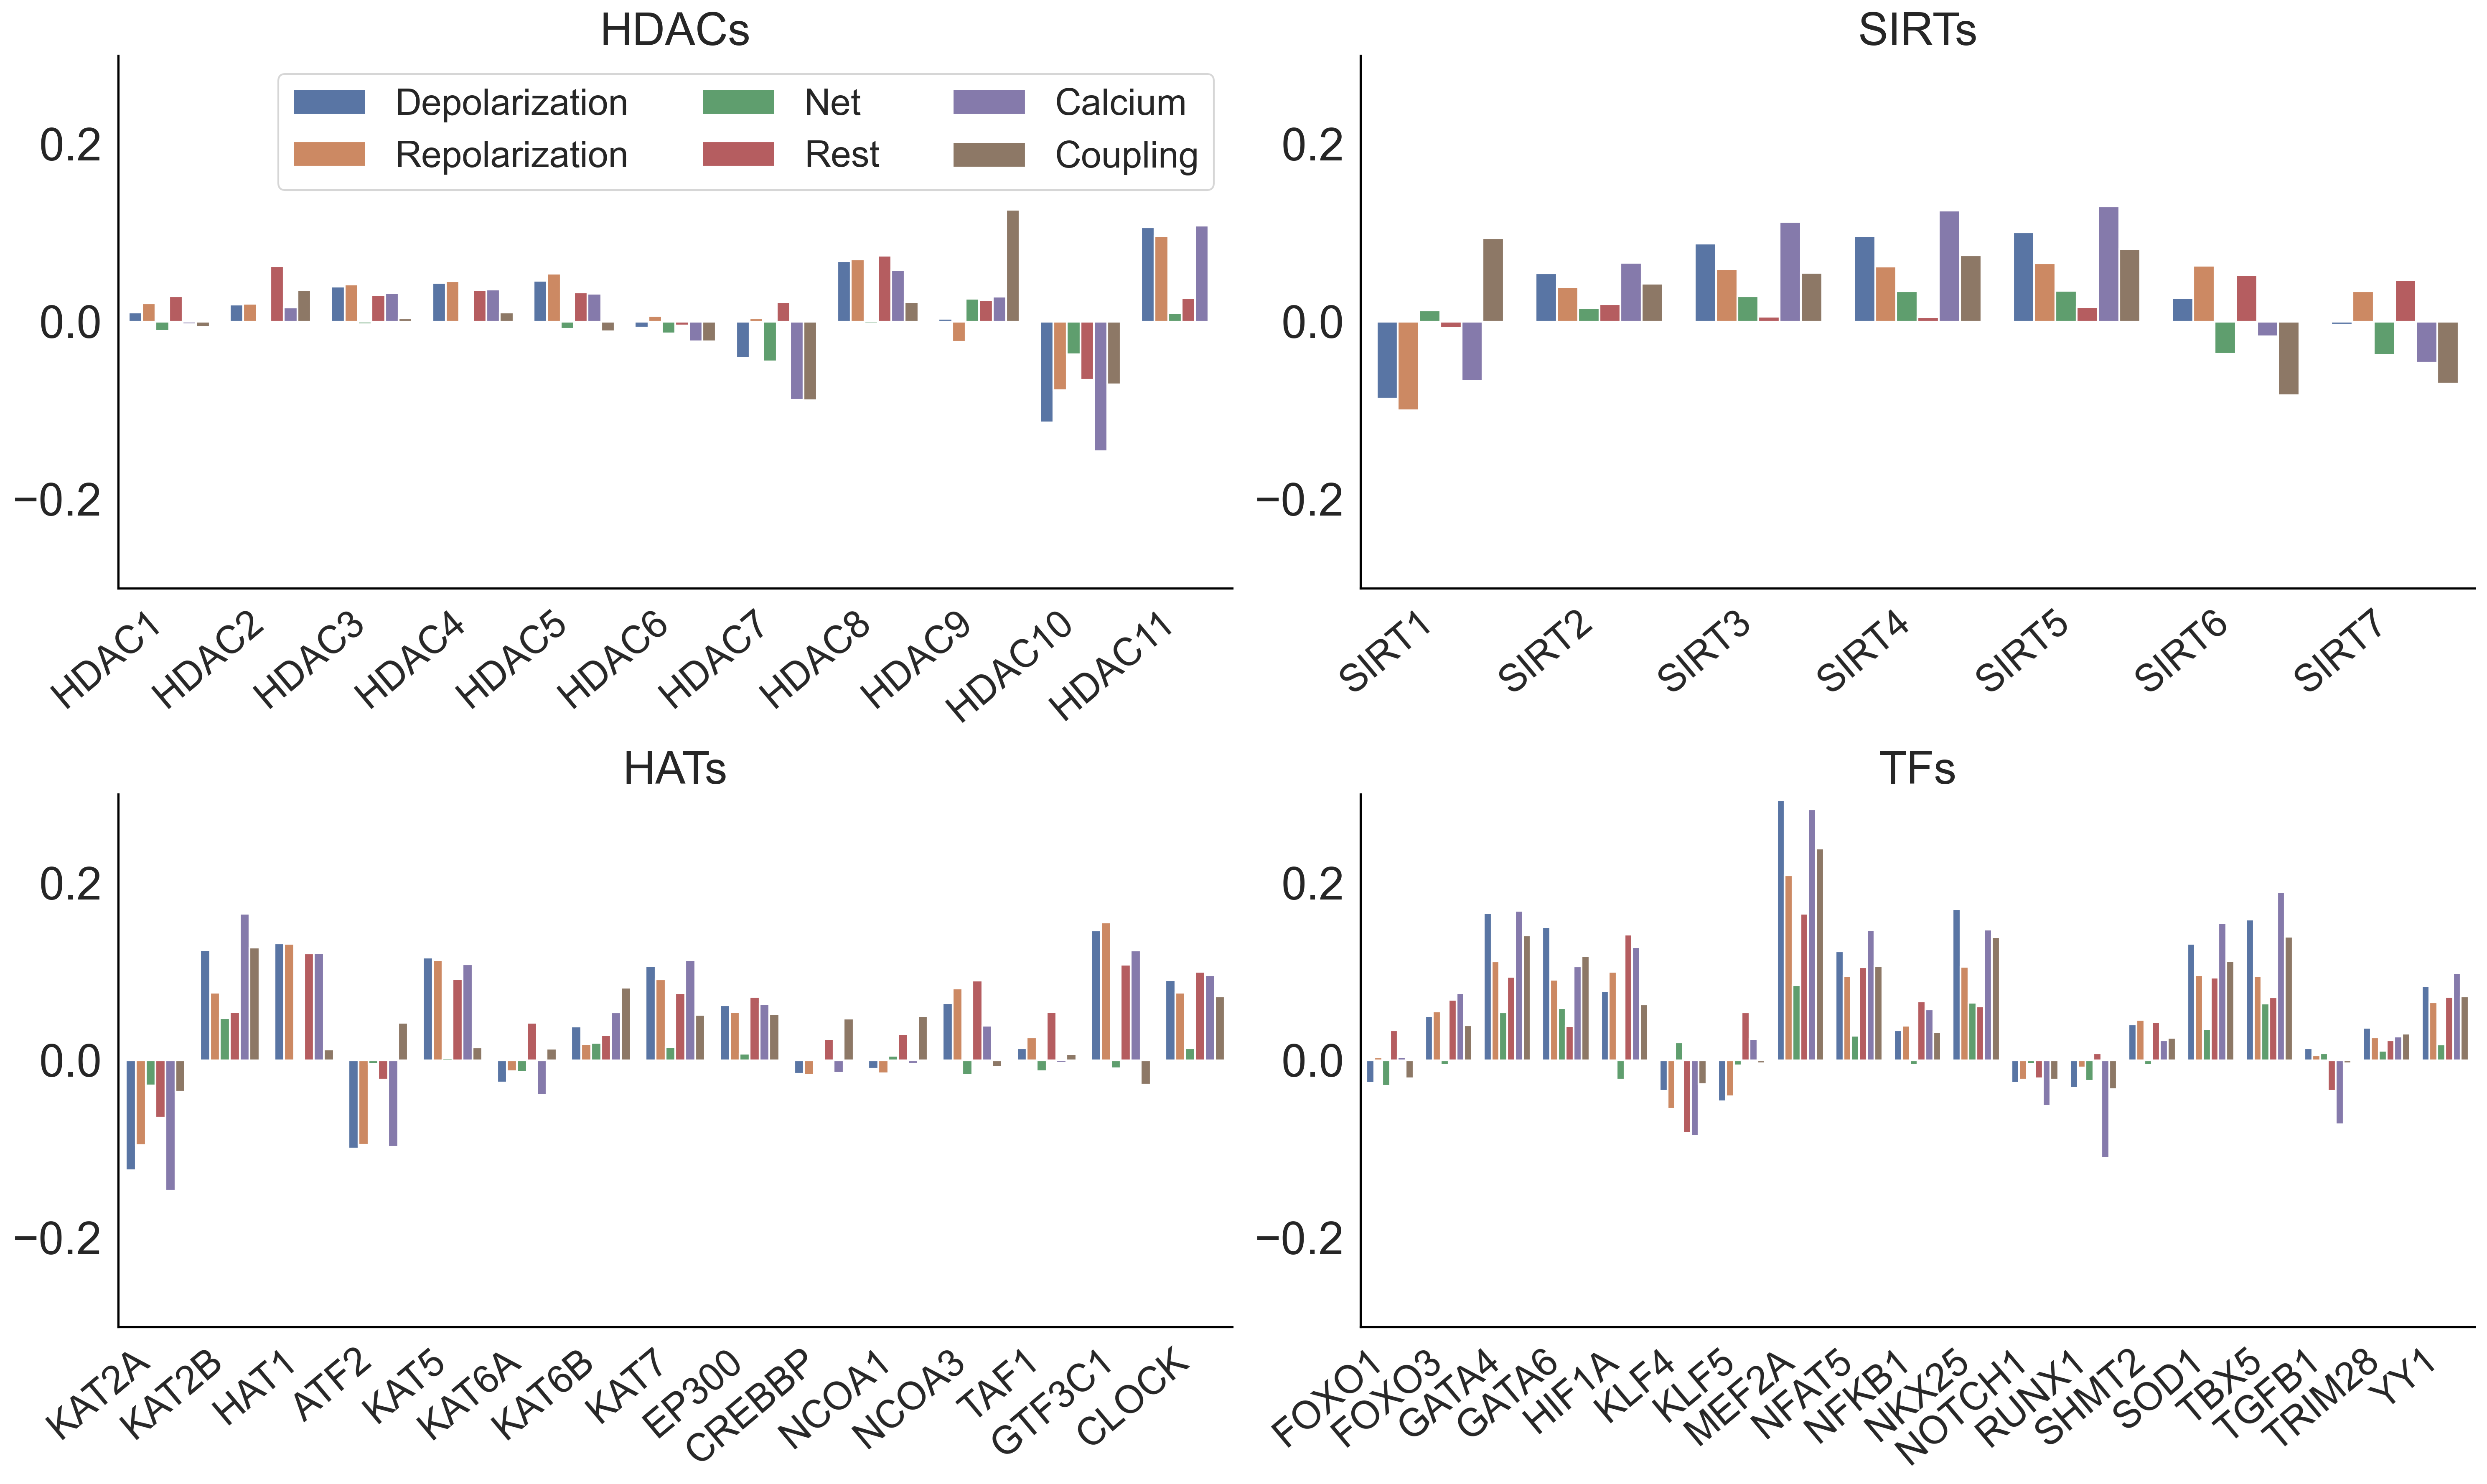

In [128]:
df = df_depol.append([df_repol, df_net, df_rest, df_cal, df_coup])
df.to_csv(filename)
sns.set(rc = {'legend.title_fontsize':22,'ytick.labelsize':26,'legend.fontsize':21,'axes.facecolor':'white','axes.edgecolor':'black','axes.spines.right': False, 'axes.spines.top': False})
fig, ax = plt.subplots(2,2, figsize = (20,12), dpi = 300, tight_layout = True)
sns.barplot(data = df_hdac, x = 'Channels', y = 'Values', hue = 'Grouping', ax = ax[0][0])
ax[0][0].set_title('HDACs', fontsize = 26)
#ax[0][0].get_legend().remove()
ax[0][0].set_ylim([-.3, .3])
ax[0][0].set_xlabel(None)
ax[0][0].set_ylabel(None)
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=40, ha='right', fontsize = 22);
ax[0][0].legend(ncol = 3)
sns.barplot(data = df_sirt, x = 'Channels', y = 'Values', hue = 'Grouping', ax = ax[0][1])
ax[0][1].set_title('SIRTs', fontsize = 26)
ax[0][1].get_legend().remove()
ax[0][1].set_ylim([-.3, .3])
ax[0][1].set_xlabel(None)
ax[0][1].set_ylabel(None)
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40, ha='right', fontsize = 22);
sns.barplot(data = df_hat, x = 'Channels', y = 'Values', hue = 'Grouping', ax = ax[1][0])
ax[1][0].set_title('HATs', fontsize = 26)
ax[1][0].get_legend().remove()
ax[1][0].set_ylim([-.3, .3])
ax[1][0].set_xlabel(None)
ax[1][0].set_ylabel(None)
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=40, ha='right', fontsize = 22);
sns.barplot(data = df_tf, x = 'Channels', y = 'Values', hue = 'Grouping', ax = ax[1][1])
ax[1][1].set_title('TFs', fontsize = 26)
ax[1][1].get_legend().remove()
ax[1][1].set_ylim([-.3, .3])
ax[1][1].set_xlabel(None)
ax[1][1].set_ylabel(None)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=40, ha='right', fontsize = 22);